**HOMEWORK-2**
NAME- TASNEEM SHABBIR ATTARWALA
PSID- 2132683


**Section A**

**1. Define type 1 and type 2 errors and give a relevant example from the field of petroleum engineering. How do you reduce these errors?**

   - Type 1 error (False Positive) happens when a true null hypothesis is incorrectly rejected. For example, A new fracking fluid is tested to enhance the recovery of oil from a reservoir. The test results indicate a significant increase in oil recovery rates, by using the new fluid. Further analysis reveals that the observed increase was due to measurement errors or other factors not increasing the effectiveness hence, The null hypothesis (new fluid does not affect recovery rates) was mistakenly rejected.
   - Type 2 error (False Negative): It happens when a false null hypothesis is not rejected. In petroleum engineering, A seismic survey is conducted to identify hydrocarbon reservoirs underground. The survey does not detect any significant reservoirs, and the drilling locations are chosen based on this information. Later exploration reveals the presence of few reservoirs in the areas that were previously surveyed. The null hypothesis (no significant reservoirs in the surveyed areas) was incorrectly accepted.
To reduce these errors, it is important to carefully plan experiments and use appropriate statistical methods.


**2. What are the common statistical assumptions?**
 - Normality: A normal distribution of data is expected.
   - Independence: It is important for observations to stand alone from one another.
   - Homoscedasticity: All levels of the independent variables have the same variance in the residuals.
   - Linearity: The connection between the independent and dependent variables ought to be linear.

**3. List the best practices for cleaning data. How do you remove duplicate observations from a data frame?**

Answer:

Many things are considered in data cleaning like handling missing values, imputation, interpolation, and outlier detection. However, the best practice may depend on the size of the dataset and the prediction. The easiest practice is to drop the rows that have missing values but it should be 2% of the size of the dataset otherwise biased results will appear. The second is to handle using mean/median/mode imputation. And lastly to set a model to predict the values.


**4. What are outliers? Why do they matter? When should you remove a outlier from a data set?**

Outliers are data points that deviate significantly from the rest of the data. They are the extreme points of the data and give the idea of data spread and maybe errors if a few outliers can be removed by Z-score transformation or IQR method.
They are important because they can skew or give biased statistical analyses and lead to incorrect conclusions.
 Outliers should be removed from a dataset if they are the result of errors and do not accurately represent the data distribution.


**5. What are the types of missing data? How do you deal with missing data?**

Completely absent at random (MCAR):

This happens when there is an equal chance of missing data for every observation, independent of whether the data is observed or not. Regardless of the values of other variables, the likelihood of missing data is the same for any observation.

At-Risk Missing (MAR):

This happens when there is a relationship between the missing data and the observed data but not the unseen data. The values of other variables in the dataset can explain a values absence or presence.

Not at Random Missing (MNAR):
This happens when data missingness is linked to unobserved data, meaning that the missing data differs systematically from the


**6. Define Arithmetic mean, Harmonic mean and Geometric mean. How are they different in terms of their power?**

**Arithmetic mean:** It is the average of a set of all values like the addition of all values divided by the number of values.


**The harmonic mean:** This is calculated as the reciprocal of the average of the reciprocals of the values. For our example, the reciprocals of the numbers are 1/3, 1/4, and 1/5 then find the average of these reciprocals and then again reciprocal them. That’s the harmonic mean.


**Geometric mean**: The geometric mean is calculated as the nth root of the product of n values. For our example, the product of the values is: 5 * 10 * 15 * 20 = 15000. Geometric Mean (4 numbers): ∛15000 ≈ 12.91 Since there are 4 values, the geometric mean is 12.91


**7. What are the tests required for Normality, Linearity and Homoskedasticity?**

**Normality:** The Anderson-Darling, Kolmogorov-Smirnov, and Shapiro-Wilk tests are among the tests used to measure normality.

**Linearity:** Residual and scatter plots can be used to evaluate this.

**Homoskedasticity**: White and Breusch-Pagan tests, among others, can be used.



**8. What is the statical test to be used to evaluate the association between production and a formation (qualitative variable) in a study that has 5 different formations?**

Analysis of variance (ANOVA) can be used to assess the relationship between production and a qualitative variable using five categories. ANOVA examines if the means of three or more independent or unrelated  groups differ in any statistical way.

**9. What are the conclusions of a successful data wrangling process?**

Data that has been cleaned and arranged. Elimination of redundant or unnecessary data.
Uniform formats and data types of each column and value.
Better data quality for analysis that is more trustworthy and formatted for good results and model building


**Section B**
10. Using “China_Oilfield.csv” production data, where (y) was given as a function of:
X1 = The total number of wells producing
X2 = Wells coming online that were shut
X3 = New wells added
X4 = The injected water volume last year
X5 = The oil moisture content of last year
X6 = The oil production rate of last year
X7 = The recovery percent of last year
X8 = The oil output of last year
10.1. Perform data exploration

In [334]:
#import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

#import data from csv file
df=pd.read_csv('China_Oilfield.csv')

#visually look at the data
df.head()

,year,y,x1,x2,x3,x4,x5,x6,x7,x8
0,1983,1442800,689,612,311,2375900,41.80,1.45,9.07,1421900
1,1984,1417200,855,720,351,2305000,42.33,1.53,9.54,1442800
2,1985,1466100,1028,874,426,2765900,42.93,1.60,9.49,1417200
3,1986,1454500,1268,1087,472,3306400,46.21,1.55,10.25,1466100
4,1987,1489400,1446,1197,652,3981400,45.80,1.49,9.35,1454500


In [335]:
#Check the dataset dimensions
df.shape

(24, 10)

In [336]:
#check variables types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    24 non-null     int64  
 1   y       24 non-null     int64  
 2   x1      24 non-null     int64  
 3   x2      24 non-null     int64  
 4   x3      24 non-null     int64  
 5   x4      24 non-null     int64  
 6   x5      24 non-null     float64
 7   x6      24 non-null     float64
 8   x7      24 non-null     float64
 9   x8      24 non-null     int64  
dtypes: float64(3), int64(7)
memory usage: 2.0 KB


In [337]:
#summary statistics for the dataset
Summary=df.describe(include='all')
Summary

,year,y,x1,x2,x3,x4,x5,x6,x7,x8
count,24.000000,2.400000e+01,24.000000,24.000000,24.000000,2.400000e+01,24.000000,24.000000,24.000000,2.400000e+01
mean,1994.500000,3.949742e+06,4474.916667,3487.958333,859.916667,1.254121e+07,60.349167,1.160417,13.166667,3.608029e+06
std,7.071068,2.513695e+06,3371.137983,2883.126224,487.336141,8.680148e+06,11.444300,0.258633,3.201741,2.252834e+06
min,1983.000000,1.417200e+06,689.000000,612.000000,311.000000,2.305000e+06,41.800000,0.830000,9.070000,1.417200e+06
25%,1988.750000,1.629025e+06,1845.250000,1497.250000,482.750000,5.089575e+06,48.925000,0.905000,9.982500,1.541750e+06
50%,1994.500000,3.609450e+06,3795.000000,2852.000000,731.500000,1.147070e+07,63.255000,1.145000,13.265000,3.259200e+06
75%,2000.250000,4.835625e+06,5556.250000,3548.750000,1043.250000,1.709108e+07,71.880000,1.385000,15.980000,4.665400e+06
max,2006.000000,9.623000e+06,12314.000000,11092.000000,2347.000000,3.298700e+07,72.950000,1.600000,17.740000,9.051000e+06


In [338]:
# Check for missing values
print(df.isnull().sum())

year    0
y       0
x1      0
x2      0
x3      0
x4      0
x5      0
x6      0
x7      0
x8      0
dtype: int64


In [339]:
X = df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']]
y = df['y']

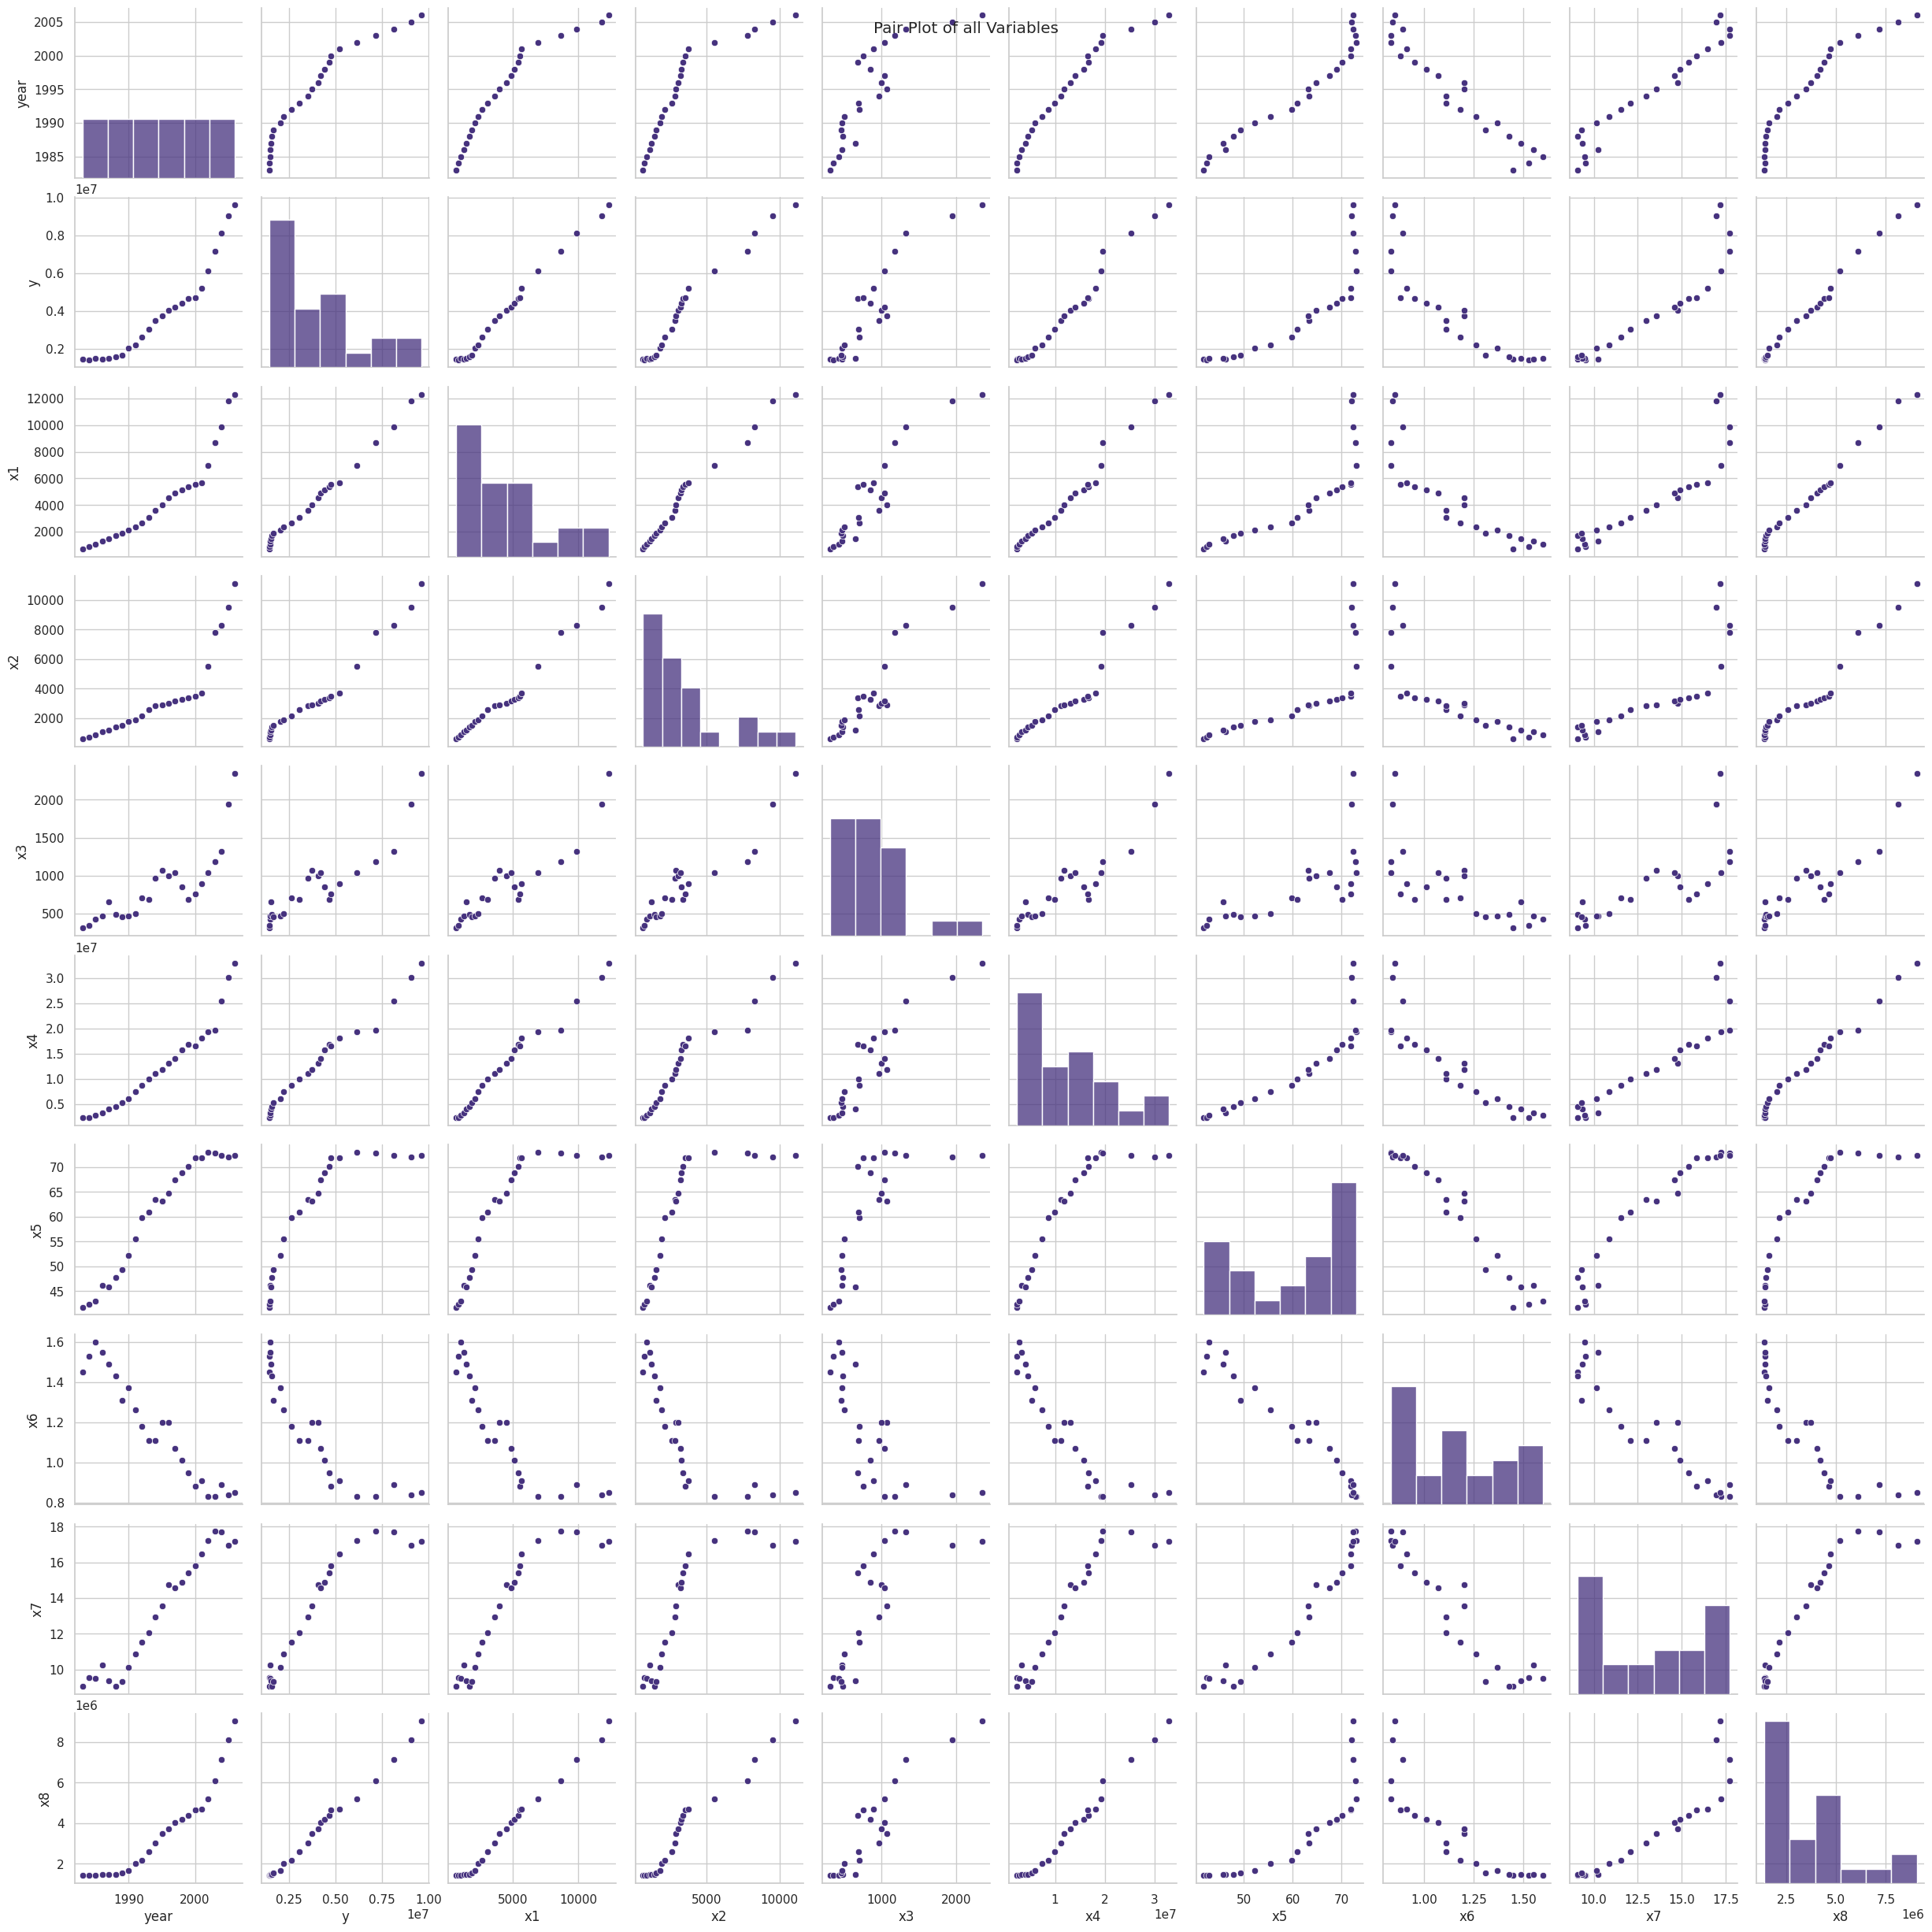

In [340]:
sns.set_palette('viridis')

# Create pair plot
sns.pairplot(df)
plt.suptitle('Pair Plot of all Variables')
plt.show()

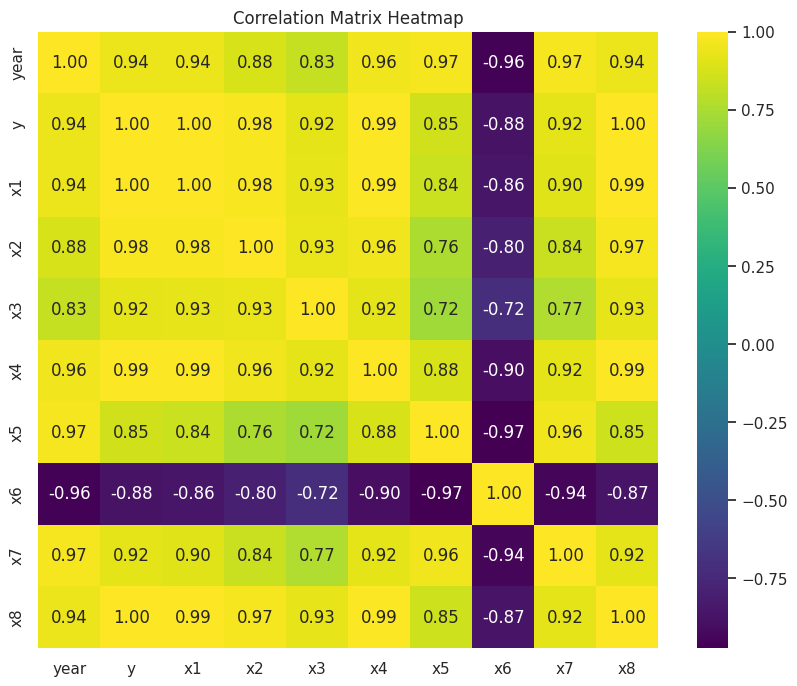

In [341]:
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


REMOVIONG AND CHECKING FOR OUTLIERS IN THE entire dataset i.e from year 1983-2006

Column 'x1' has 2 outliers.
Column 'x2' has 4 outliers.
Column 'x3' has 2 outliers.


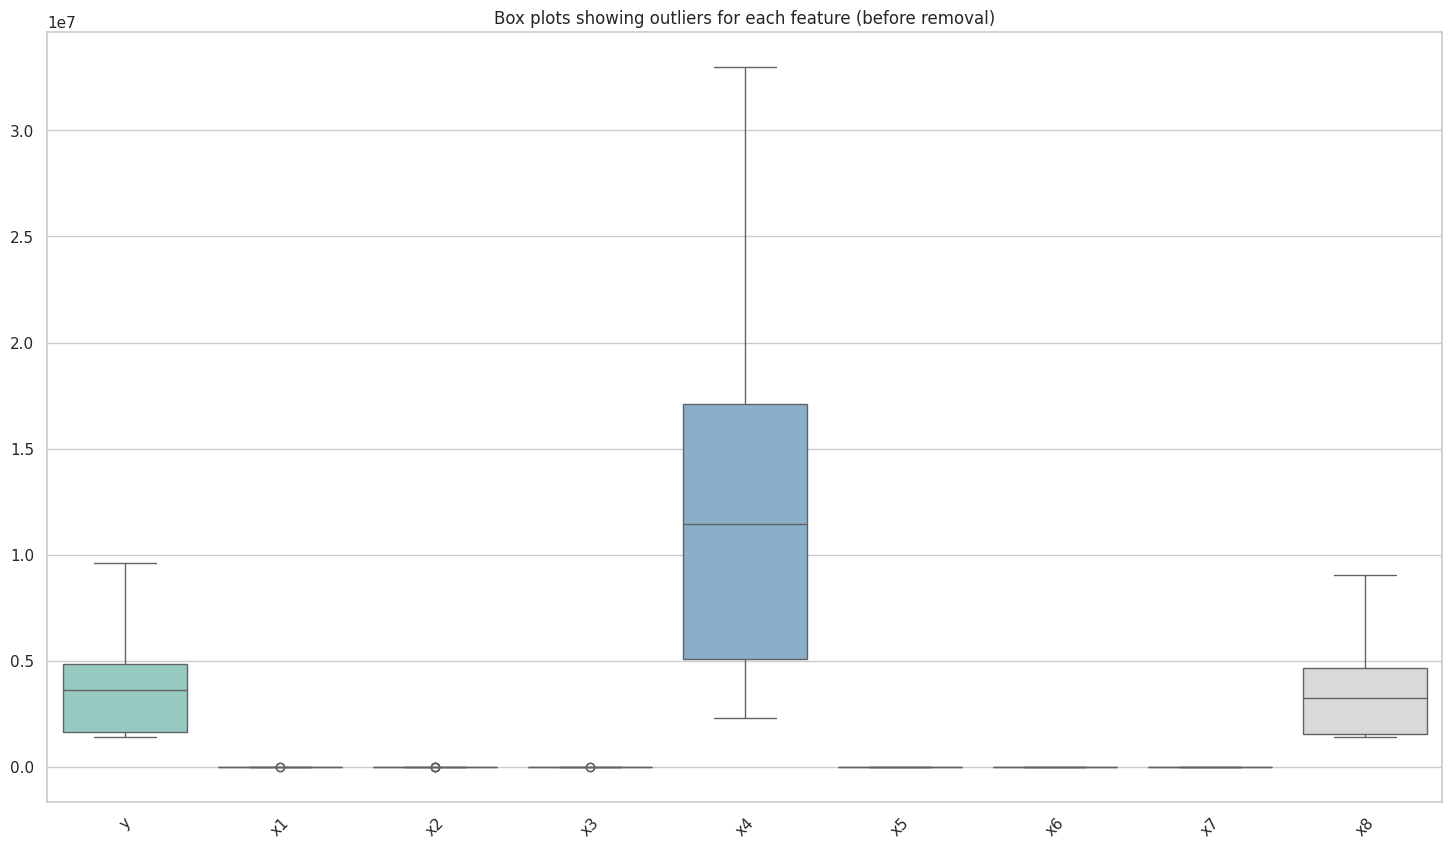

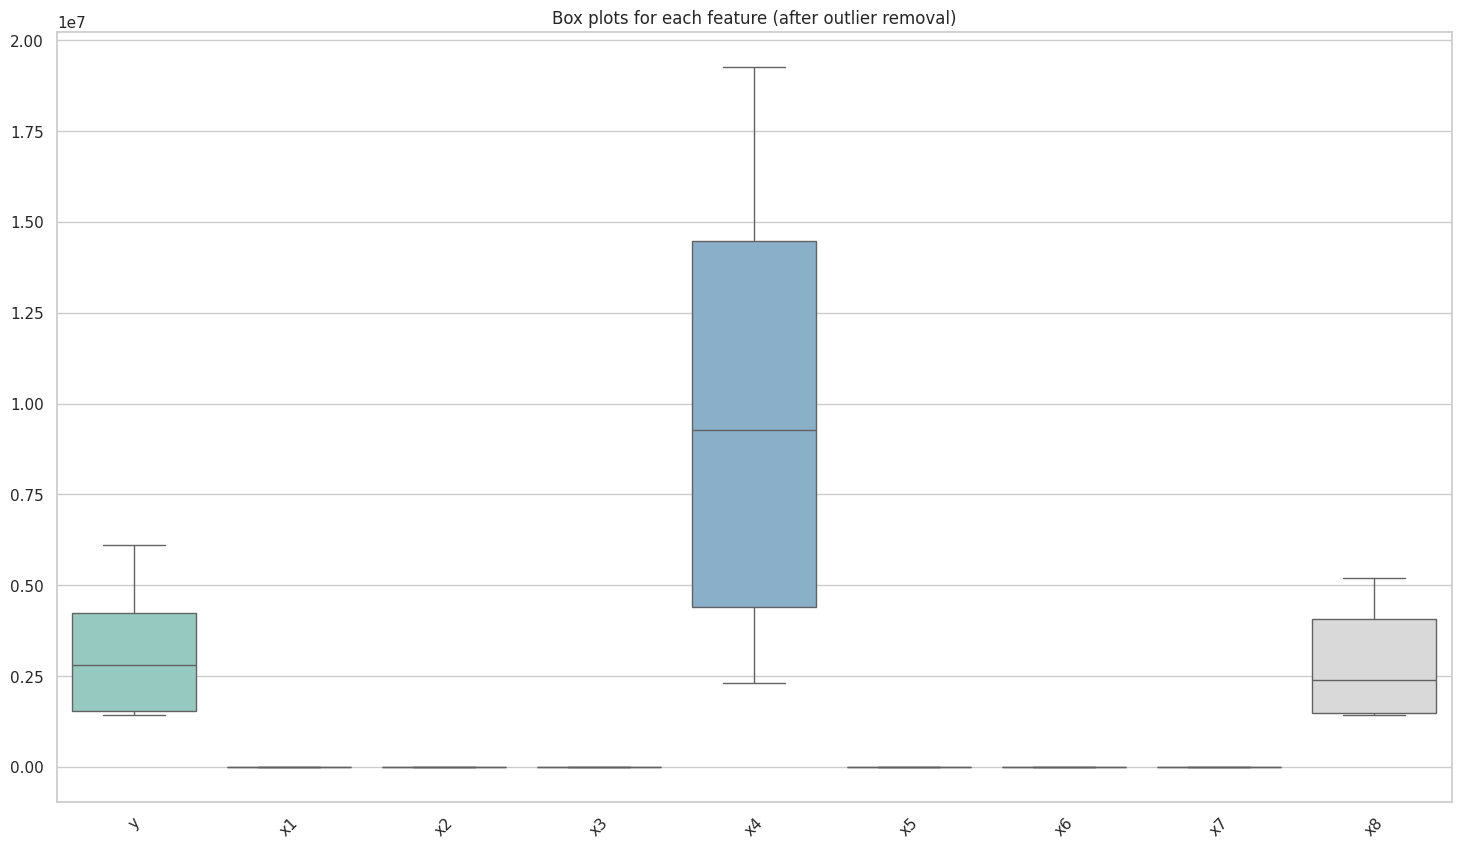

In [342]:
import seaborn as sns
import matplotlib.pyplot as plt

def detect_outliers(df, columns):
    outlier_indices = []
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        if len(outliers) > 0:
            print(f"Column '{col}' has {len(outliers)} outliers.")
            outlier_indices.extend(outliers)
    return list(set(outlier_indices))

# Define the columns to check for outliers
columns_to_check = ['y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']

# Detect outliers
outlier_indices = detect_outliers(df, columns_to_check)

# Display the outliers
outliers = df.loc[outlier_indices]

# Plot box plots for each feature
plt.figure(figsize=(18, 10))
sns.set(style="whitegrid")  # Set the style
sns.boxplot(data=df.drop('year', axis=1), palette='Set3')  # Set the color palette
plt.title('Box plots showing outliers for each feature (before removal)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Remove the outliers
df_no_outliers = df.drop(outlier_indices)

# Plot box plots again without outliers
plt.figure(figsize=(18, 10))
sns.set(style="whitegrid")  # Set the style
sns.boxplot(data=df_no_outliers.drop('year', axis=1), palette='Set3')  # Set the color palette
plt.title('Box plots for each feature (after outlier removal)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()




REMOVIONG AND CHECKING FOR OUTLIERS IN THE TRAINING DATA i.e from year 1983-1999  only which will be our training data.

In [343]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the data

# Filter data for the years 1983-1999
data_1983_1999 = df[(df['year'] >= 1983) & (df['year'] <= 1999)]

# Define the columns to check for outliers
columns_to_check = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']

# Define a function to detect outliers using IQR
def detect_outliers_iqr(data, columns):
    outlier_indices = []
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outlier_indices.extend(outliers.index)
    return list(set(outlier_indices))

# Detect outliers in the data from 1983-1999
outlier_indices = detect_outliers_iqr(data_1983_1999, columns_to_check)


Outliers are:
Empty DataFrame
Columns: [year, y, x1, x2, x3, x4, x5, x6, x7, x8]
Index: []


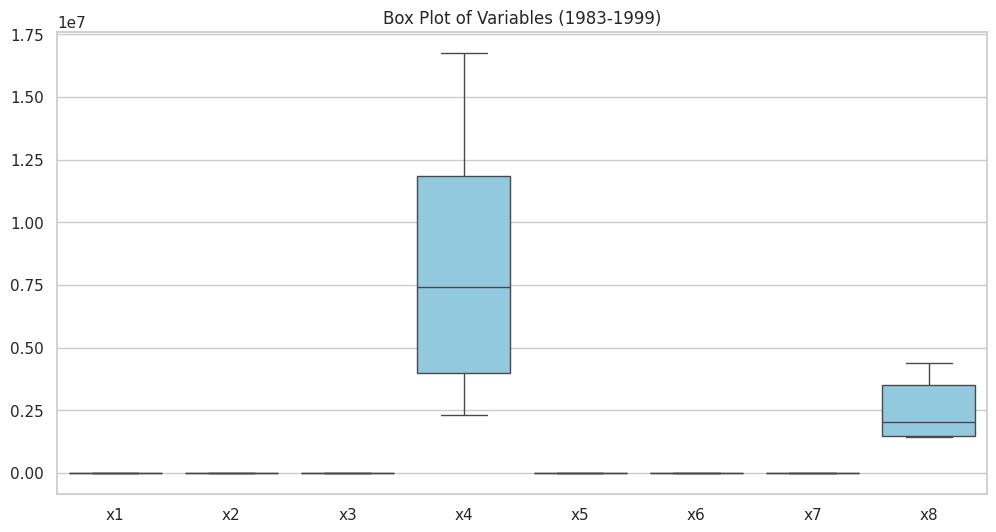

In [344]:
# Print the outliers
outliers = data_1983_1999.loc[outlier_indices]
print("Outliers are:")
print(outliers)

# Plot a box plot to visualize the outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_1983_1999[columns_to_check], color='skyblue')
plt.title('Box Plot of Variables (1983-1999)')
plt.show()


In [345]:
# Remove outliers from the data if any are present.
data_no_outliers = data_1983_1999.drop(outlier_indices)

10.2. Train a linear regression model using the 8 variables and data from the year 1983-1999. Predict the solution from the year 2000-2006. Compare the actual and the predicted solutions.

WE HAVE EXPLORED THYE DATA NOW WE WILL PERFORM LINEAR REGRESSION

In [365]:
#Let's perform Standard Scaling to bring all the data instances to the same scale
columns_to_scale = ['y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit and transform the data
df = df.copy()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
# Show the first few rows of the scaled data
print(df.head())

   year         y        x1        x2        x3        x4        x5        x6  \
0  1983 -1.018763 -1.147192 -1.018968 -1.150587 -1.196286 -1.655682  1.143750   
1  1984 -1.029166 -1.096892 -0.980703 -1.066743 -1.204630 -1.608374  1.459721   
2  1985 -1.009295 -1.044470 -0.926140 -0.909535 -1.150390 -1.554819  1.736196   
3  1986 -1.014009 -0.971746 -0.850673 -0.813114 -1.086782 -1.262049  1.538714   
4  1987 -0.999826 -0.917809 -0.811699 -0.435815 -1.007346 -1.298645  1.301735   

         x7        x8  
0 -1.307032 -0.991262  
1 -1.157079 -0.981785  
2 -1.173032 -0.993393  
3 -0.930556 -0.971220  
4 -1.217698 -0.976480  


In [366]:
# Prepare data for training and testing how we have to spli
train_data = df[(df['year'] >= 1983) & (df['year'] <= 1999)].drop(outlier_indices)
test_data = df[(df['year'] >= 2000) & (df['year'] <= 2006)]

In [367]:
# Define features and target variables by hardcoing and putting columns 8 features
X_train = train_data[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']]
y_train = train_data['y']
X_test = test_data[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']]
y_test = test_data['y']

In [368]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [369]:
# Making the  predictions on the testing data
predictions = model.predict(X_test)

In [370]:
# Comparing the  actual and predicted solutions
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(comparison_df)

      Actual  Predicted
17  0.309967   0.353416
18  0.510108   0.503239
19  0.880114   0.891498
20  1.304047   1.352642
21  1.690430   1.777724
22  2.073034   2.162955
23  2.305481   2.796960


In [371]:
# Calculate and print the model's performance metrics for better understanidng
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.03738339508274794
R-squared: 0.9261056011195351


In [ ]:
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

10.3. Use the following four variables only and repeat the model training. Compare the error between using 8 variable model and 4 variable model to see which model is better.
X2 = Wells coming online that were shut
X4 = The injected water volume last year
X5 = The oil moisture content of last year
X7 = The recovery percent of last year

In [372]:
# Select the features and target variable for the 4-variable features  model
X_train_4 = train_data[['x2', 'x4', 'x5', 'x7']]
y_train4 = train_data['y']
X_test_4 = test_data[['x2', 'x4', 'x5', 'x7']]
y_test4 = test_data['y']

In [373]:
# Initialize linear regression models
model_4 = LinearRegression()


In [374]:
# Train the models
model_4.fit(X_train_4, y_train4)


LinearRegression()

In [375]:
# Make predictions
y_pred_4 = model_4.predict(X_test_4)

In [376]:
# Calculate Mean Squared Error and R-squared for the 4-variable model
mse_4 = mean_squared_error(y_test4, y_pred_4)
r2_4 = r2_score(y_test4, y_pred_4)


In [377]:
print("Results for the 4-variable model:")
print(f"Mean Squared Error: {mse_4}")
print(f"R-squared: {r2_4}")

Results for the 4-variable model:
Mean Squared Error: 0.009659851811920365
R-squared: 0.9809057218763514


In [378]:
# Print the results
print("Results for the 8-features model:")
print(f"Mean Squared Error: {mse_8}")
print(f"R-squared: {r2_8}\n")

print("Results for the 4-features model:")
print(f"Mean Squared Error: {mse_4}")
print(f"R-squared: {r2_4}")

Results for the 8-features model:
Mean Squared Error: 0.0033618536523862463
R-squared: 0.9261056011195373

Results for the 4-features model:
Mean Squared Error: 0.009659851811920365
R-squared: 0.9809057218763514


In [129]:
import statsmodels.api as sm

# Define the features and target variable
X = df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']]
y = df['y']

# Add a constant term to the features
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Display the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1457.
Date:                Thu, 21 Mar 2024   Prob (F-statistic):           2.93e-20
Time:                        20:14:29   Log-Likelihood:                 74.729
No. Observations:                  24   AIC:                            -131.5
Df Residuals:                      15   BIC:                            -120.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0615      0.050      1.231      0.2

In [130]:
import numpy as np
import statsmodels.api as sm

# Assuming 'model' is your fitted OLS model from statsmodels

# Calculate the Residual Standard Error (RSE)
rse = np.sqrt(model.scale)
print("Residual Standard Error (RSE):", rse)


Residual Standard Error (RSE): 0.013600497437468878


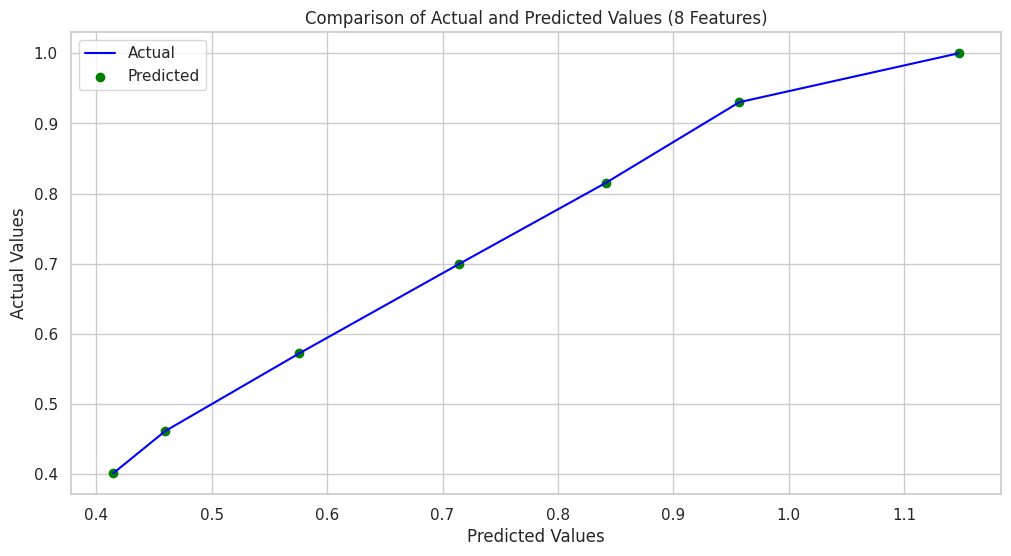

In [161]:
import matplotlib.pyplot as plt

# Create a line plot for the actual values
plt.figure(figsize=(12, 6))
plt.plot(y_pred_8, y_test, label='Actual', color='blue')

# Create a scatter plot for the predicted values
plt.scatter(x=y_pred_8, y=y_test, label='Predicted', color='green')

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Comparison of Actual and Predicted Values (8 Features)')
plt.legend()
plt.show()


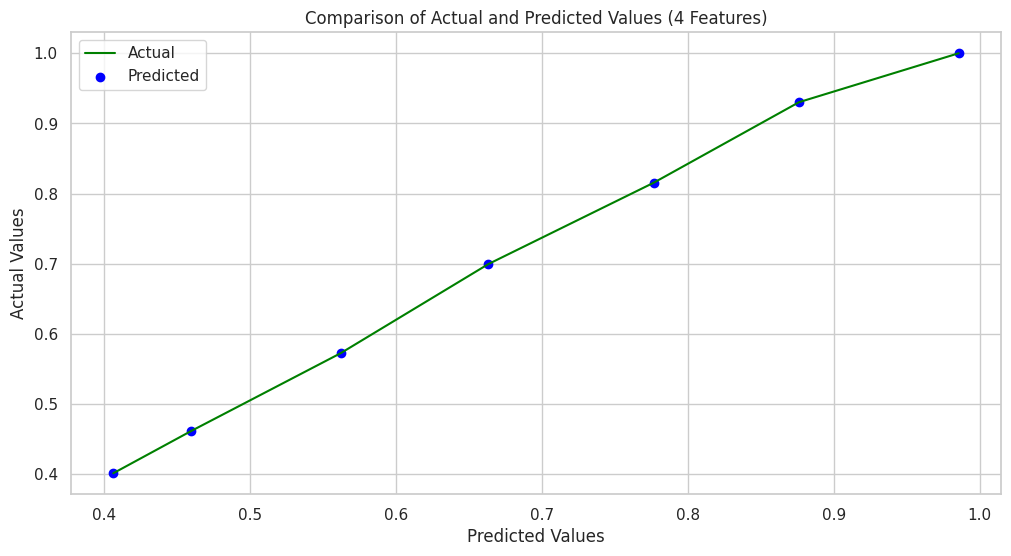

In [163]:
import matplotlib.pyplot as plt

# Create a line plot for the actual values
plt.figure(figsize=(12, 6))
plt.plot(y_pred_4, y_test4, label='Actual', color='green')

# Create a scatter plot for the predicted values
plt.scatter(x=y_pred_4, y=y_test4, label='Predicted', color='blue')

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Comparison of Actual and Predicted Values (4 Features)')
plt.legend()
plt.show()


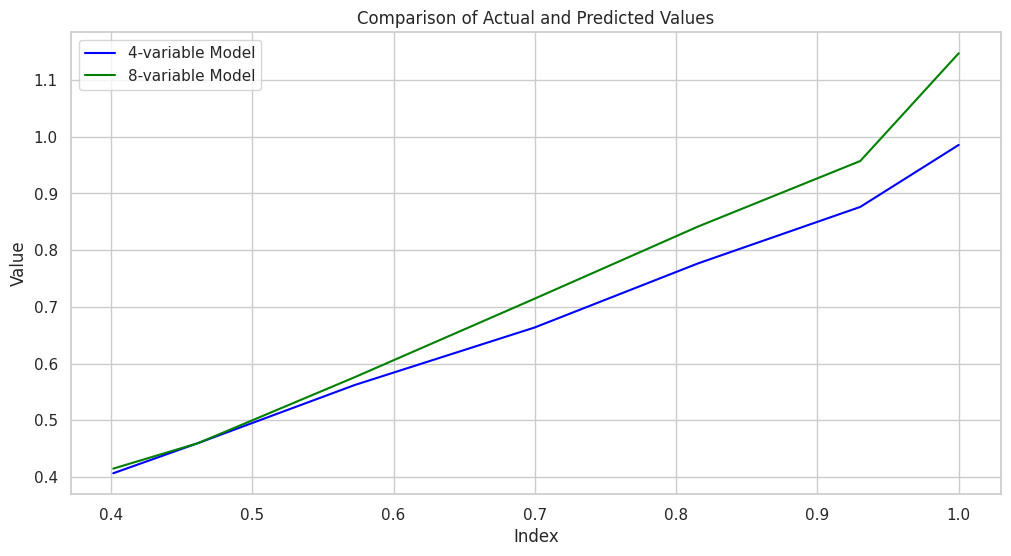

In [330]:
# Plotting the line graph for both models
plt.figure(figsize=(12, 6))

# Line plot for the 4-variable model
plt.plot(y_test, y_pred_4, color='blue', label='4-variable Model')

# Line plot for the 8-variable model
plt.plot(y_test, y_pred_8, color='green', label='8-variable Model')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

10.4. Use the 4 variable model from the previous training data and a new model trained from the “China_Oilfield_2.csv” data from the year 1983-1999 to predict the production between 2000-2006 and compare the error to see which model performs better.r.

In [311]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the China_Oilfield_2.csv data
data_prev = pd.read_csv('China_Oilfield.csv')
data_new = pd.read_csv('China_Oilfield_2.csv')




In [312]:
data_new

,year,ynew,x2new,x4new,x5new,x7new
0,1983,1352300,407,1564500,40.96,8.92
1,1984,1326700,515,1493600,41.49,9.39
2,1985,1375600,669,1954500,42.09,9.34
3,1986,1364000,882,2495000,45.37,10.10
4,1987,1398900,992,3170000,44.96,9.20
5,1988,1468700,1212,3739600,46.96,8.93
6,1989,1561800,1319,4457700,48.46,9.16
7,1990,1934100,1556,5209000,51.31,9.98
8,1991,2085400,1698,6594800,54.62,10.73
9,1992,2515900,1918,7865100,58.99,11.39


In [314]:
data_prev

,year,y,x1,x2,x3,x4,x5,x6,x7,x8
0,1983,1442800,689,612,311,2375900,41.80,1.45,9.07,1421900
1,1984,1417200,855,720,351,2305000,42.33,1.53,9.54,1442800
2,1985,1466100,1028,874,426,2765900,42.93,1.60,9.49,1417200
3,1986,1454500,1268,1087,472,3306400,46.21,1.55,10.25,1466100
4,1987,1489400,1446,1197,652,3981400,45.80,1.49,9.35,1454500
5,1988,1559200,1705,1417,486,4551000,47.80,1.43,9.08,1489400
6,1989,1652300,1892,1524,458,5269100,49.30,1.31,9.31,1559200
7,1990,2024600,2113,1761,473,6020400,52.15,1.37,10.13,1652300
8,1991,2175900,2372,1903,506,7406200,55.46,1.26,10.88,2024600
9,1992,2606400,2640,2123,705,8676500,59.83,1.18,11.54,2175900


In [317]:
data_new.columns


Index(['year', 'ynew', 'x2new', 'x4new', 'x5new', 'x7new'], dtype='object')

In [318]:
# Standard Scaling to bring all the data instances to the same scale on the original dataset (China_oilfield)
columns_to_scale = ['y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit and transform the data
data_prev = data_prev.copy()
data_prev[columns_to_scale] = scaler.fit_transform(data_prev[columns_to_scale])

In [319]:

#Standard Scaling to bring all the data instances to the same scale on the new dataset (China_oilfield2)
columns_to_scale = ['ynew', 'x2new', 'x4new', 'x5new','x7new']
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit and transform the data
data_new = data_new.copy()
data_new[columns_to_scale] = scaler.fit_transform(data_new[columns_to_scale])

In [320]:
# Split the datasets into training and testing sets
train_prev = data_prev[data_prev['year'] <= 1999]
test_prev = data_prev[data_prev['year'] >= 2000]

train_new = data_new[data_new['year'] <= 1999]
test_new = data_new[data_new['year'] >= 2000]

In [321]:

# Train the model on the original dataset
model_prev= LinearRegression()
model_prev.fit(train_prev[['x2', 'x4', 'x5', 'x7']], train_prev['y'])



LinearRegression()

In [322]:
# Train the model on the new dataset
model_new = LinearRegression()
model_new.fit(train_new[['x2new', 'x4new', 'x5new', 'x7new']], train_new['ynew'])


LinearRegression()

In [323]:
# Predict on the test sets
pred_prev = model_prev.predict(test_prev[['x2', 'x4', 'x5', 'x7']])
pred_new = model_new.predict(test_new[['x2new', 'x4new', 'x5new', 'x7new']])


In [324]:
# Calculate MSE for both models
mse_prev = mean_squared_error(test_prev['y'], pred_prev)
mse_new = mean_squared_error(test_new['ynew'], pred_new)


In [325]:

# Output the MSE values
print('MSE with original dataset model:', mse_prev)
print('MSE with new dataset model:', mse_new)


MSE with original dataset model: 0.009659851811920365
MSE with new dataset model: 0.00611366350404372


In [326]:
# Determine which model has a lower MSE
if mse_prev < mse_new:
    print("Previous dataset performs better.")
else:
    print("New dataset “China_Oilfield_2.csv” performance is  better.")

New dataset “China_Oilfield_2.csv” performance is  better.


In [ ]:
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Section C**


Using the hypertension and Ambulatory Recording Venetia study dataset (http://www.statsci.org/data/general/harvest.html) please answer the following analytics questions:
11. Is there ana association between gender and sport activity?
11.1. What statistical test would you use to test this association for statistical significance?
11.2. What is the value of the test statistic?
11.3. What is the p-vale of the test statistic?
11.4. Is this association statistically significant (using p<0.05 threshold)? Yes/no
11.5. Did you meet the statistical assumption of the test? Explain your answer
11.6. Provide your code that you used to answer the analytics question.

In [256]:
import pandas as pd  #importing necessary library
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency #chi sqaured

In [257]:
#read the data  where separating them using tab
df = pd.read_csv('http://www.statsci.org/data/general/harvest.txt',sep='\t')


In [258]:
df.shape #how many rows and columns present

(1100, 28)

In [ ]:
#print  the column names of the DataFrame
print(df.columns)



In [260]:
df.head() # this shows the first few rows of the dataset 5 rows

,Smoke,Sport,SBPCB,DBPCB,HRCB,SBPAB,DBPAB,HRAB,SBPA3,DBPA3,...,DBPCE,HRCE,SBPAE,DBPAE,HRAE,AgeB,BMIB,EndPoint,Time,Male
0,0,0,152.00,98.00,80.67,133.13,83.80,71.18,129.56,81.21,...,.,.,.,.,.,24,22.694,0,80,1
1,2,2,153.33,96.33,99.67,130.60,73.25,70.42,.,.,...,.,.,.,.,.,42,26.644,0,73,0
2,1,0,149.33,103.67,73,116.34,84.95,76.85,.,.,...,.,.,.,.,.,28,22.266,0,80,0
3,0,2,149.33,92.00,74,104.99,74.33,76.05,115.48,77.91,...,.,.,.,.,.,44,23.951,0,80,1
4,0,2,158.00,105.00,73.33,115.26,77.97,81.47,118.07,79.44,...,.,.,.,.,.,36,22.234,0,80,0


In [261]:
df =df[['Sport','Male']] # the dataframe contains sport and gender (male)
df.head(7) # showing first four dataset

,Sport,Male
0,0,1
1,2,0
2,0,0
3,2,1
4,2,0
5,2,1
6,0,1


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sport   1100 non-null   object
 1   Male    1100 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 17.3+ KB


In [263]:
print("Total Unique values in Sport column- ",df['Sport'].nunique())
print("Total Unique values in (gender) Male column-  ",df['Male'].nunique())

Total Unique values in Sport column-  5
Total Unique values in (gender) Male column-   2


In [264]:
# looping statement for above code for sport and male
for column in ['Sport','Male']:
    unique_val = df[column].unique()
    print(f"Unique values in the column are '{column}': {unique_val}")

Unique values in the column are 'Sport': ['0' '2' '3' '1' '.']
Unique values in the column are 'Male': [1 0]


In [265]:
# taking to drop the cells containing '.'
df = df.drop(df[df['Sport'] == '.'].index)

In [266]:
df2 =df.rename(columns={'Male':'Gender'})
df2.head(4)

,Sport,Gender
0,0,1
1,2,0
2,0,0
3,2,1


In [267]:
#categorical value female - 0 and male - 1 and then display
df2['Gender'] = df2['Gender'].replace(1,'Male').replace(0,'Female')
df2.head(4)

,Sport,Gender
0,0,Male
1,2,Female
2,0,Female
3,2,Male


In [268]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1088 entries, 0 to 1099
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sport   1088 non-null   object
 1   Gender  1088 non-null   object
dtypes: object(2)
memory usage: 25.5+ KB


**11. Is there any association between gender and sport activity?:**

Several distinct significance tests are used to determine the statistical significance of the link. In this instance, there are two variables that are categorical in nature. As a result, the Chi-squared test is utilized to ascertain statistical significance, and it functions effectively when there are two categorical variables involved.
- An atable displaying the joint distribution is required in order to compute **chi-squared.**

In [269]:
#contigency table need to be generated
contigency_tab = pd.crosstab(df2['Sport'],df2['Gender'])
print("Table ",contigency_tab,sep='\n\n')

Table 

Gender  Female  Male
Sport               
0          241   455
1           38   123
2           21   134
3            2    74


In [270]:
# now we are generalizing it
contigency_tab_gen = pd.crosstab(df2['Sport'],df2['Gender'],normalize='index')
print("Normalized Contigency Table - Observed Counts: ",contigency_tab_gen,sep='\n\n')

Normalized Contigency Table - Observed Counts: 

Gender    Female      Male
Sport                     
0       0.346264  0.653736
1       0.236025  0.763975
2       0.135484  0.864516
3       0.026316  0.973684


*** 11.2. What is the value of the test statistic?***


The degree to which the observed frequencies in a contingency table differ from the expected frequencies in the case that the variables were independent is measured by the test statistic in the chi-squared test.

In [271]:
chi_sq2 = chi2_contingency(contigency_tab)
print(f"Test statistic, chi-square: {chi_sq2[0]:.2f}")

Test statistic, chi-square: 57.30


The larger the p-value, the stronger the association between the variables. The chi-squared value of 57.30 in this instance indicates a relatively stronger association between the attributes of "sport" and "gender."


**11.3. What is the p-value of the test statistic?**

 In terms of statistical hypothesis, based on a selected significance threshold, the p-value of the test statistic in a chi-square test helps determine whether to accept or reject the null hypothesis by indicating the degree of opposition to it.

In [272]:
print(f"p-value: {chi_sq2[1]}")

p-value: 2.222557457564394e-12


11.4. Is this association statistically significant (using p<0.05 threshold)?

Yes/no  ?


YES
It is clear that the observed data are statistically significant because the p-value is less than 0.05, which was the selected significance level. Consequently, the null hypothesis can be disproved. As a result, we can confirm that there is a statistically significant relationship between the characteristics of gender and sport.


In [273]:
alphaValue = 0.05
if chi_sq2[1] < alphaValue:
    print("Association is statistically significant")
else:
    print("Association is not statistically significant")

Association is statistically significant


**11.5. Did you meet the statistical assumption of the test? Explain your answer.**

The following statistical presumptions underpin the chi-squared test:

A minimum sample size of thirty is necessary.

At least 80% of the cells in the contingency table should have predicted counts of 5 or greater.

The contingency table's expected counts for every cell must be greater than 1.

In [274]:
chi_sq2[3]

array([[193.19117647, 502.80882353],
       [ 44.68933824, 116.31066176],
       [ 43.02389706, 111.97610294],
       [ 21.09558824,  54.90441176]])

In [275]:
# Check the assumptions
if (df.shape[0] > 30) | ((chi_sq2[3] > 5).sum()/chi_sq2[3].size < 0.8) | (chi_sq2[3]< 1).any():
    print('All statistical assumptions are satisfied')
else:
    print("Statistical assumptions are not satisfied")

All statistical assumptions are satisfied


**11.6. Provide your code that you used to answer the analytics question.  

The codes are available in each area above. and according to questions as mentioned.